In [ ]:
# This notebook uses sympy to calculate the appropriate coefficients 
# for the derivative stencils for the various cases used in engrenage, 
# and checks the Grid and Derivative classes work as expected

# restart the kernel to clear past work
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
import numpy as np
from sympy import symbols, simplify, pprint, diff, expand, collect
import matplotlib.pyplot as plt
import sys
%matplotlib inline

sys.path.append('../')
from source.Grid import *
from source.Derivatives import *

In [2]:
# Set up a Grid class
max_r = 10.0
num_points = 32
log_factor = 1.05
my_grid = Grid(max_r, num_points, log_factor)
#print(my_grid.derivatives.d1_matrix)

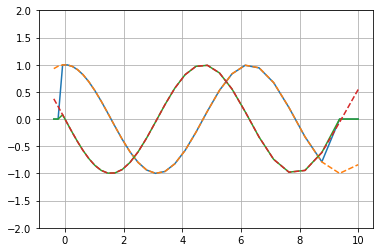

In [4]:
# Now test the derivatives
r = my_grid.r_vector
y = np.sin(r)
dydr = np.dot(my_grid.derivatives.d1_matrix, y)

plt.plot(r, dydr, '-')
plt.plot(r, np.cos(r), '--')

d2ydr2 = np.dot(my_grid.derivatives.d2_matrix, y)

plt.plot(r, d2ydr2, '-')
plt.plot(r, -np.sin(r), '--')

plt.ylim([-2,2])
plt.grid()

In [3]:
# Check the finite derivatives for a fixed spacing dx, centered derivative
# using 5 points (so O(dx^4) accurate)

# Construct the polynomial using sympy
x = symbols('x')
deltax = symbols('dx')
x3 = symbols('x3')
x2 = x3-deltax
x1 = x2-deltax
x4 = x3+deltax
x5 = x4+deltax
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5
print("Using sympy we get the polynomial", simplify(P))
#pprint(simplify(P))

# Now take the derivative twice
dPdx = diff(P, x)
print("Its first derivative is", simplify(dPdx))

d2Pdx2 = diff(dPdx, x)
print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the central point x3
dPdx_at_x3 = dPdx.subs(x, x3)
d2Pdx2_at_x3 = d2Pdx2.subs(x, x3)
print("Its first derivative at x2 is", simplify(dPdx_at_x3))
print("Its second derivative at x2 is", simplify(d2Pdx2_at_x3))
print("This gives the first derivative stencil \n")
pprint(simplify(dPdx_at_x3))
print("This gives the second derivative stencil \n")
pprint(simplify(d2Pdx2_at_x3))

Using sympy we get the polynomial (f1*(x - x3)*(dx - x + x3)*(dx + x - x3)*(2*dx - x + x3) - 4*f2*(x - x3)*(dx - x + x3)*(2*dx - x + x3)*(2*dx + x - x3) + 6*f3*(dx - x + x3)*(dx + x - x3)*(2*dx - x + x3)*(2*dx + x - x3) + 4*f4*(x - x3)*(dx + x - x3)*(2*dx - x + x3)*(2*dx + x - x3) - f5*(x - x3)*(dx - x + x3)*(dx + x - x3)*(2*dx + x - x3))/(24*dx**4)
Its first derivative is (dx**3*f1 - 8*dx**3*f2 + 8*dx**3*f4 - dx**3*f5 - dx**2*f1*x + dx**2*f1*x3 + 16*dx**2*f2*x - 16*dx**2*f2*x3 - 30*dx**2*f3*x + 30*dx**2*f3*x3 + 16*dx**2*f4*x - 16*dx**2*f4*x3 - dx**2*f5*x + dx**2*f5*x3 - 3*dx*f1*x**2 + 6*dx*f1*x*x3 - 3*dx*f1*x3**2 + 6*dx*f2*x**2 - 12*dx*f2*x*x3 + 6*dx*f2*x3**2 - 6*dx*f4*x**2 + 12*dx*f4*x*x3 - 6*dx*f4*x3**2 + 3*dx*f5*x**2 - 6*dx*f5*x*x3 + 3*dx*f5*x3**2 + 2*f1*x**3 - 6*f1*x**2*x3 + 6*f1*x*x3**2 - 2*f1*x3**3 - 8*f2*x**3 + 24*f2*x**2*x3 - 24*f2*x*x3**2 + 8*f2*x3**3 + 12*f3*x**3 - 36*f3*x**2*x3 + 36*f3*x*x3**2 - 12*f3*x3**3 - 8*f4*x**3 + 24*f4*x**2*x3 - 24*f4*x*x3**2 + 8*f4*x3**3 + 2*f5*x**

In [4]:
# For the advective derivatives we can do the same but taking the values at x2
# (and x4) instead

# Now find the value at the central point x3
dPdx_at_x2 = dPdx.subs(x, x2)
print("Its first derivative at x2 is", simplify(dPdx_at_x2))
print("This gives the first derivative advective stencil \n")
pprint(simplify(dPdx_at_x2))

Its first derivative at x2 is (-3*f1 - 10*f2 + 18*f3 - 6*f4 + f5)/(12*dx)
This gives the first derivative advective stencil 

-3⋅f₁ - 10⋅f₂ + 18⋅f₃ - 6⋅f₄ + f₅
─────────────────────────────────
              12⋅dx              


In [73]:
# Now for the logarithmic case

# Check the finite derivatives for a fixed spacing dx, centered derivative
# using 5 points (so O(dx^4) accurate)

# Construct the polynomial using sympy
x = symbols('x')
c = symbols('c')
dx = symbols('dx')
x1 = dx/2
x2 = x1+(c*dx)
x3 = x2+(c*c*dx)
x4 = x3+(c*c*c*dx)
x5 = x4+(c*c*c*c*dx)
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5
#print("Using sympy we get the polynomial", simplify(P))
#pprint(simplify(P))

# Now take the derivative twice
dPdx = diff(P, x)
#print("Its first derivative is", simplify(dPdx))

d2Pdx2 = diff(dPdx, x)
#print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the central point x3
dPdx_at_x3 = dPdx.subs(x, x3)
d2Pdx2_at_x3 = d2Pdx2.subs(x, x3)
#print("Its first derivative at x2 is", simplify(dPdx_at_x3))
#print("Its second derivative at x2 is", simplify(d2Pdx2_at_x3))
#print("This gives the first derivative stencil \n")
#pprint(simplify(dPdx_at_x3))
#print("This gives the second derivative stencil \n")
#pprint(simplify(d2Pdx2_at_x3))

# Easier to isolate out the terms one by one - coeff of f5 first
f5_dPdx_at_x3 = dPdx_at_x3.subs(f1, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f2, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f3, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f4, 0)
f5_dPdx_at_x3 = simplify(f5_dPdx_at_x3)
dR_at_x3 = (c*c*dx)
print("The coefficient of the f5 term in the first derivative stencil is \n")
pprint(f5_dPdx_at_x3 * dR_at_x3)

The coefficient of the f5 term in the first derivative stencil is 

               -f₅               
─────────────────────────────────
 2 ⎛ 2        ⎞ ⎛ 3    2        ⎞
c ⋅⎝c  + c + 1⎠⋅⎝c  + c  + c + 1⎠


In [74]:
# check the form matches the simpler one used in the code
# (sympy not great at simplifying)
check = -f5/(c**2 * (1 + c) *(1 + c**2) * (1 + c + c**2))
simplify(f5_dPdx_at_x3 * dR_at_x3 - check)

0

In [90]:
# check the one sided stencil for the end points
dPdx_at_x1 = dPdx.subs(x, x1)
d2Pdx2_at_x1 = d2Pdx2.subs(x, x1)
# Easier to isolate out the terms one by one - coeff of f5 first
f5_dPdx_at_x1 = dPdx_at_x1.subs(f1, 0)
f5_dPdx_at_x1 = f5_dPdx_at_x1.subs(f2, 0)
f5_dPdx_at_x1 = f5_dPdx_at_x1.subs(f3, 0)
f5_dPdx_at_x1 = f5_dPdx_at_x1.subs(f4, 0)
f5_dPdx_at_x1 = simplify(f5_dPdx_at_x1)
dR_at_x1 = dx
print("The coefficient of the f5 term in the first derivative stencil is \n")
pprint(f5_dPdx_at_x1 * dR_at_x3)

The coefficient of the f5 term in the first derivative stencil is 

        -f₅         
────────────────────
 5 ⎛ 3    2        ⎞
c ⋅⎝c  + c  + c + 1⎠


In [77]:
# Check that polynomial gives right value for the first point below r=0 
# (should just be same as value at x1, so f1)
P_at_x0 = P.subs(x, dx/2)
pprint(P_at_x0)

f₁


In [88]:
# Check that polynomial gives right value for the second point below r=0 
P_at_xm1 = P.subs(x, dx/2 + dx/c)
#pprint(simplify(P_at_xm1))
# Easier to isolate out the terms one by one - coeff of f1 first
coeff_of_f1_for_xm1 = P_at_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f3, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f4, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f5, 0)
coeff_of_f1_for_xm1 = simplify(coeff_of_f1_for_xm1)
pprint(coeff_of_f1_for_xm1)

   ⎛ 12    11    10    9      8      7    5      4    3    2          ⎞
f₁⋅⎝c   + c   + c   - c  - 2⋅c  - 3⋅c  + c  + 3⋅c  + c  - c  - 2⋅c + 1⎠
───────────────────────────────────────────────────────────────────────
                       8 ⎛ 4    3      2        ⎞                      
                      c ⋅⎝c  + c  + 2⋅c  + c + 1⎠                      


In [89]:
# Check that polynomial gives right value for the third point below r=0 
P_at_xm2 = P.subs(x, dx/2 + dx/c + dx/c/c)
#pprint(simplify(P_at_xm2))
# Easier to isolate out the terms one by one - coeff of f1 first
coeff_of_f1_for_xm2 = P_at_xm2.subs(f2, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f2, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f3, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f4, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f5, 0)
coeff_of_f1_for_xm2 = simplify(coeff_of_f1_for_xm2)
pprint(coeff_of_f1_for_xm2)

   ⎛ 14      11      10      9      8      7      6    5      4      3    2     
f₁⋅⎝c   - 2⋅c   - 2⋅c   - 2⋅c  + 2⋅c  + 3⋅c  + 4⋅c  + c  - 2⋅c  - 4⋅c  - c  + c 
────────────────────────────────────────────────────────────────────────────────
                                     12 ⎛ 2    ⎞                                
                                    c  ⋅⎝c  + 1⎠                                

   ⎞
+ 1⎠
────
    
    


In [92]:
# For KO dissipation we need to implement a 6th order derivative stencil
# KO term = - sigma * d^6f/dx^6 / 2^6
# Construct the polynomial using sympy
x = symbols('x')
c = symbols('c')
dx = symbols('dx')
x0 = - dx/2
x1 = dx/2
x2 = x1+(c*dx)
x3 = x2+(c*c*dx)
x4 = x3+(c*c*c*dx)
x5 = x4+(c*c*c*c*dx)
x6 = x5+(c*c*c*c*c*dx)
f0 = symbols('f0')
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')
f6 = symbols('f6')

L0 = (x - x0 ) / (x0 - x2) * (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L1 = (x - x0 ) / (x0 - x2) * (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x0 ) / (x0 - x2) * (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x0 ) / (x0 - x2) * (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
L6 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f0 * L0 + f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5 + f6 * L6

# Now take the derivative to 6th order
dPdx = diff(P, x)
d2Pdx2 = diff(dPdx, x)
d3Pdx3 = diff(d2Pdx2, x)
d4Pdx4 = diff(d3Pdx3, x)
d5Pdx5 = diff(d4Pdx4, x)
d6Pdx6 = diff(d5Pdx5, x)

# check the central differences
KO_at_x3 = d6Pdx6.subs(x, x3)
# Easier to isolate out the terms one by one - coeff of f5 first
f5_KO_at_x3 = KO_at_x3.subs(f1, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f2, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f3, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f4, 0)
f5_KO_at_x3 = simplify(f5_dPdx_at_x1)
dR_at_x3 = dx*c*c
print("The coefficient of the f5 term in the first derivative stencil is \n")
pprint(f5_KO_at_x3 * dR_at_x3)

The coefficient of the f5 term in the first derivative stencil is 

        -f₅         
────────────────────
 5 ⎛ 3    2        ⎞
c ⋅⎝c  + c  + c + 1⎠
